In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

### 1) Preprocessing: 
### I. Detect face and eye separately

(1333, 2000, 3)


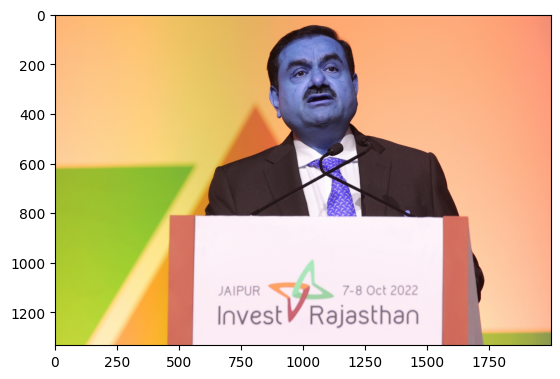

In [2]:
path_to_imgs = "/Dataset/"
path_to_test = "/Test_images/"
# print(os.getcwd() + path_to_test)

color_img = cv2.imread(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
print(color_img.shape)
plt.imshow(color_img)

(1333, 2000)


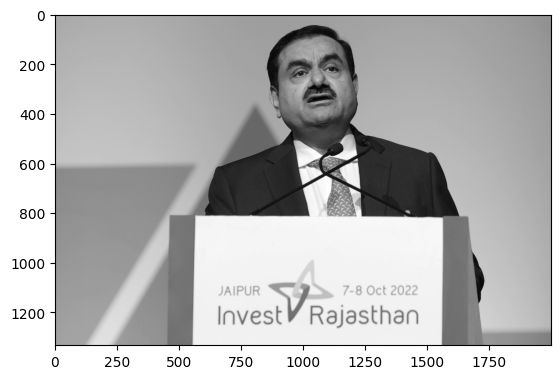

In [3]:
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img, cmap="gray")

In [4]:
path_to_haar_clf = "/Opencv/haarcascades/"
face_clf = cv2.CascadeClassifier(os.getcwd() + path_to_haar_clf + "haarcascade_frontalface_default.xml")
eye_clf = cv2.CascadeClassifier(os.getcwd() + path_to_haar_clf + "haarcascade_eye.xml")

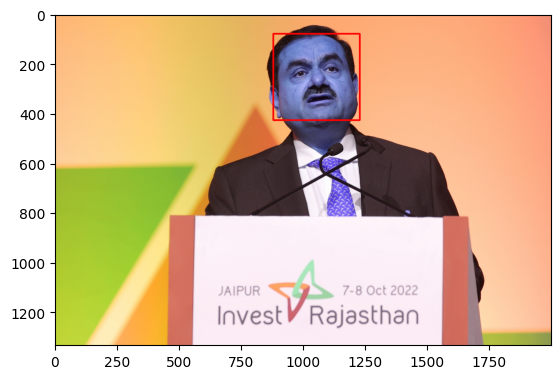

In [5]:
face_loc = face_clf.detectMultiScale(color_img,1.3,5)
(x,y,w,h) = face_loc[0]
color_face = cv2.rectangle(color_img,(x,y),(x+w,y+h),(255,0,0),5)
plt.imshow(color_face)

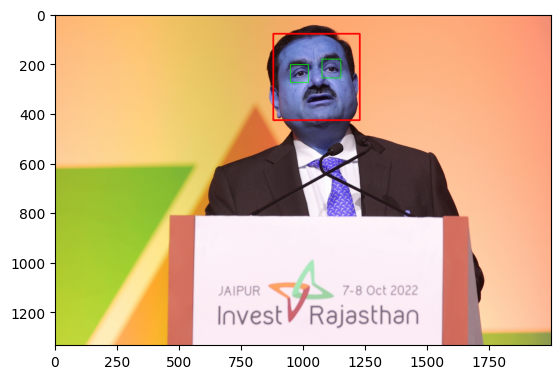

In [6]:
for (x,y,w,h) in face_loc:
    face_detected = cv2.rectangle(color_img,(x,y),(x+w,y+h),(255,0,0),5)
    c_face = face_detected[y:y+h,x:x+w]
    g_face = gray_img[y:y+h,x:x+w]
    eye_loc = eye_clf.detectMultiScale(g_face)
    for (x_e,y_e,w_e,h_e) in eye_loc:
        eye_detected = cv2.rectangle(c_face,(x_e,y_e),(x_e+w_e,y_e+h_e),(0,255,0),2)

plt.figure()
plt.imshow(face_detected, cmap="gray")
plt.show()

In [7]:
# %matplotlib inline

# plt.imshow(c_face, cmap='gray')

In [8]:
# cropped_img = np.array(c_face)
# cropped_img.shape

### II. To get a cropped image if 2 eyes are seen in an image

In [9]:
def get_a_cropped_img_if_both_eyes(img_path):
    img = cv2.imread(img_path)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces_loc = face_clf.detectMultiScale(g_img, 1.2, 3)
    for (x,y,w,h) in faces_loc:
        c_face = img[y:y+h,x:x+h]
        g_face = g_img[y:y+h,x:x+h]
        eyes_loc = eye_clf.detectMultiScale(g_face)
        if len(eyes_loc) >= 2:
            return c_face

In [10]:
# img_1 = cv2.imread(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
# plt.imshow(img_1)

# cropped_img = get_a_cropped_img_if_both_eyes(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
# plt.imshow(cropped_img)

### III. Create a cropped dataset for each leader

#### - Path for each leader subdir in dataset 

In [11]:
subdir_paths = []
for subdir in os.scandir(os.getcwd() + path_to_imgs):
    if subdir.is_dir():
        subdir_paths.append(subdir.path)        
# subdir_paths

#### - Create a folder for all cropped images

In [12]:
import shutil

path_to_cr_imgs = "/Dataset/Cropped_data/"
if os.path.exists(os.getcwd() + path_to_cr_imgs): # checks if "Cropped_data" folder exists
    shutil.rmtree(os.getcwd() + path_to_cr_imgs) # removes the folder if it exists
os.mkdir(os.getcwd() + path_to_cr_imgs) # creates a new folder name "Cropped_data"

#### - Iterate through each image to get cropped images

#### --> Iterate through each of the image dictionary --> crop images and have them store in separate leader_name folders --> rename imgs and have them store in cropped_img_rename_dict, leader_name as a key and multiple rename_img_paths as value --> save cropped imgs as an image in a cropped_folder/leader using cv2.imwrite()

In [183]:
# import re
# import imghdr

# # cropped_img_dirs = []
# cropped_img_rename_dict = {}
# ext_ = []

# for subdir in subdir_paths:
#     leader = subdir.split("/")[-1]
#     cropped_img_rename_dict[leader] = []
#     counter = 1
# #     print(leader)
    
#     for img_path in os.scandir(subdir):
#         if imghdr.what(img_path) is not None:
#             ext = img_path.path.split(".")[-1]
#             ext_.append(ext)

#             cropped_img = get_a_cropped_img_if_both_eyes(img_path.path)
#             if cropped_img is not None and cropped_img.shape[0] != 0 and cropped_img.shape[1] != 0:
#                 cropped_folder = os.getcwd() + path_to_cr_imgs + leader
#                 if not os.path.exists(cropped_folder):
#                     os.makedirs(cropped_folder)
#                     cropped_img_dirs.append(cropped_folder)
# #                     print("Generating cropped images of", leader, "in folder: ",cropped_folder)

#                 cropped_img_rename = leader + str(counter) + ".png"
#                 cropped_img_rename_path = cropped_folder + "/" + cropped_img_rename
            
#                 cv2.imwrite(cropped_img_rename_path, cropped_img) ## Saving the imgs in cropped_data folder using imwrite()
# # # #                 print(os.listdir(cropped_img_rename_path))
#                 cropped_img_rename_dict[leader].append(cropped_img_rename_path)
#                 counter += 1
#         else:
#             continue

# # list(set(ext_))        

### IV. Feature Engineering (feature extraction) using wavelet transform

In [89]:
import numpy as np
import pywt
import cv2    

def waveTrans(img, mode, level):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY )
    img =  np.float32(img)   
    img /= 255
    # Decomposition
    coeffs = pywt.wavedec2(img, mode, level)
    # Process Coefficients
    coeffs_H = list(coeffs)  
    coeffs_H[0] *= 0 
    # Reconstruction
    img_H = pywt.waverec2(coeffs_H, mode);
    img_H *= 255
    img_H =  np.uint8(imArray_H)
    return img_H

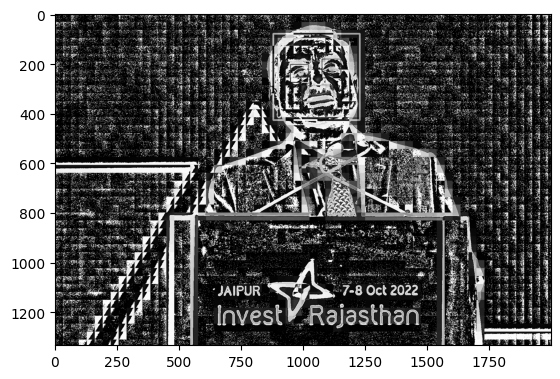

In [90]:
im_har = w2d(color_img, 'db1', 5)
plt.imshow(im_har, cmap = "gray")

### V. Creating arrays for both training_images and class labels

In [91]:
y_labels_dict = {}
label = 0
for leader in cropped_img_rename_dict.keys():
    y_labels_dict[leader] = label
    label += 1
y_labels_dict

{'elon_musk': 0,
 'jeff_bezos': 1,
 'anand_mahindra': 2,
 'Gautam_adani': 3,
 'ratan_tata': 4,
 'Cropped_data': 5}

In [127]:
X, y = [], []
for leader, training_imgs in cropped_img_rename_dict.items():
    for training_img in training_imgs:
        img = cv2.imread(training_img)
        scaled_img = cv2.resize(img, (32,32))
        haar_img = waveTrans(img, 'db1', 5)
        scaled_img_haar = cv2.resize(haar_img, (32,32))
        new_img = np.vstack((scaled_img.reshape(32*32*3,1), scaled_img_haar.reshape(32*32,1)))
        X.append(new_img)
        y.append(y_labels_dict[leader])

In [142]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float) # so that while training, the classifier does not throw any error
print(X.shape)
print(np.array(y).shape)

(365, 4096)
(365,)


## 2) Training
### I. Splitting data 

In [169]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [171]:
pipe = Pipeline([("scaler", StandardScaler()),("svc", SVC(kernel = "linear", C = 5))])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(classification_report(y_test, pipe.predict(X_test)))

0.8152173913043478
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.79      0.65      0.71        17
           2       0.94      0.89      0.92        19
           3       0.91      0.91      0.91        34
           4       0.58      0.64      0.61        11

    accuracy                           0.82        92
   macro avg       0.77      0.78      0.77        92
weighted avg       0.82      0.82      0.82        92



### II. Optimization with GridSearchCV

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [181]:
model_params = {
    "svm": {
        "model": svm.SVC(gamma="auto", probability=True),
        "params": {
            "svc__C" : [1,10,100,1000],
            "svc__kernel" : ["rbf","linear"]
        }
    },
    
    "random forest": {
        "model" : RandomForestClassifier(),
        "params" : {
            "randomforestclassifier__n_estimators" : [1,5,10,15,20,25,30],
            "randomforestclassifier__criterion" : ["gini", "entropy", "log_loss"],
            "randomforestclassifier__max_depth" : [4,5,6,7,8]
        }
    },
    
    "linear regression": {
        "model" : LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "logisticregression__C" : [1,5,10,15]
        }
    }
    
}

In [182]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.794949,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random forest,0.703704,"{'randomforestclassifier__criterion': 'gini', ..."
2,linear regression,0.842626,{'logisticregression__C': 5}
